In [44]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
from utils.mining_data_tb import *
from utils.vizualitation_tb import *
import plotly.express as px
from sklearn.impute import SimpleImputer
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

#### Vamos a importar el dataset que se encuentra en la carpeta data y ver el tamaño de este.

In [45]:
sep = os.sep
df = pd.read_csv(os.path.dirname(os.getcwd()) + sep + 'data' + sep + 'phl_exoplanet_catalog.csv')
df.shape

(4048, 112)

#### Vemos que el df tiene 4048 registros y 112 columnas. Vamos a quedarnos con las columnas que nos interesan.
- 'P_NAME' --
- 'P_DETECTION'
- 'P_MASS'
- 'P_RADIUS'
- 'P_PERIOD'
- 'P_ESI'
- 'P_GRAVITY'
- 'P_DENSITY'
- 'P_DISTANCE'
- 'S_DISTANCE'
- 'S_MASS'
- 'S_RADIUS_EST'
- 'S_TYPE'
- 'S_RA_H'
- 'S_DEC_T'

In [46]:
columnas_escogidas = ['P_NAME', 'P_DETECTION', 'P_MASS', 'P_RADIUS', 'P_PERIOD', 'P_ESI', 'P_GRAVITY', 'P_DENSITY', 'P_DISTANCE', 'S_DISTANCE', 'S_MASS', 'S_RADIUS_EST', 'S_TYPE', 'S_RA_H', 'S_DEC_T']
df = df[columnas_escogidas]

#### Primero vamos a eliminar aquellas columnas que superen el 70% de valores NaN

In [47]:
eliminar_columnas_nan(df, 0.6)

Eliminada columna P_MASS
Eliminada columna P_GRAVITY
Eliminada columna P_DENSITY
Eliminada columna S_TYPE


#### Ahora vemos como ha quedado el resto de valores NAN

In [48]:
numero_nan(df)

P_NAME           0.000000
P_DETECTION      0.000000
P_RADIUS        22.455534
P_PERIOD         2.717391
P_ESI            8.078063
P_DISTANCE       1.729249
S_DISTANCE       0.148221
S_MASS          18.898221
S_RADIUS_EST     5.039526
S_RA_H           0.000000
S_DEC_T          0.000000
dtype: float64

#### Vamos a cambiar las unidades de algunas columnas para poder rellenar los datos

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   P_NAME        4048 non-null   object 
 1   P_DETECTION   4048 non-null   object 
 2   P_RADIUS      3139 non-null   float64
 3   P_PERIOD      3938 non-null   float64
 4   P_ESI         3721 non-null   float64
 5   P_DISTANCE    3978 non-null   float64
 6   S_DISTANCE    4042 non-null   float64
 7   S_MASS        3283 non-null   float64
 8   S_RADIUS_EST  3844 non-null   float64
 9   S_RA_H        4048 non-null   float64
 10  S_DEC_T       4048 non-null   object 
dtypes: float64(8), object(3)
memory usage: 348.0+ KB


In [50]:
df.S_DEC_T = df.S_DEC_T.apply(convertir_a_grados_decimales) 
df.S_DISTANCE = df.S_DISTANCE.apply(lambda x: x/3.26)

In [51]:
imp = SimpleImputer(missing_values = np.nan, strategy='median')
transform = imp.fit_transform(df.iloc[:, 2:].values)
df = pd.concat([df.iloc[:, :2], pd.DataFrame(transform, columns=df.columns[2:])], axis=1)

In [52]:
numero_nan(df)

P_NAME          0.0
P_DETECTION     0.0
P_RADIUS        0.0
P_PERIOD        0.0
P_ESI           0.0
P_DISTANCE      0.0
S_DISTANCE      0.0
S_MASS          0.0
S_RADIUS_EST    0.0
S_RA_H          0.0
S_DEC_T         0.0
dtype: float64

<AxesSubplot:>

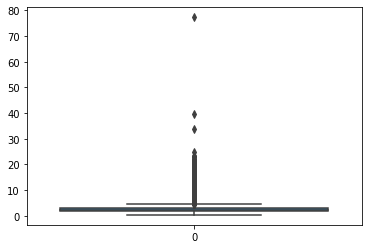

In [60]:
#### Ahora buscamos outlier
sns.boxplot(data=df['P_RADIUS'])

#### Una vez limpiado el dataframe, lo guardamos

### Tipo de metodos

In [53]:
df['P_DETECTION'].value_counts()

Transit                          3114
Radial Velocity                   765
Microlensing                       78
Imaging                            47
Transit Timing Variations          18
Eclipse Timing Variations          11
Orbital Brightness Modulation       6
Pulsar Timing                       6
Pulsation Timing Variations         2
Astrometry                          1
Name: P_DETECTION, dtype: int64

[Text(0, 0, 'Astrometry'),
 Text(1, 0, 'Pulsation Timing Variations'),
 Text(2, 0, 'Orbital Brightness Modulation'),
 Text(3, 0, 'Pulsar Timing'),
 Text(4, 0, 'Eclipse Timing Variations'),
 Text(5, 0, 'Transit Timing Variations'),
 Text(6, 0, 'Imaging'),
 Text(7, 0, 'Microlensing'),
 Text(8, 0, 'Radial Velocity'),
 Text(9, 0, 'Transit')]

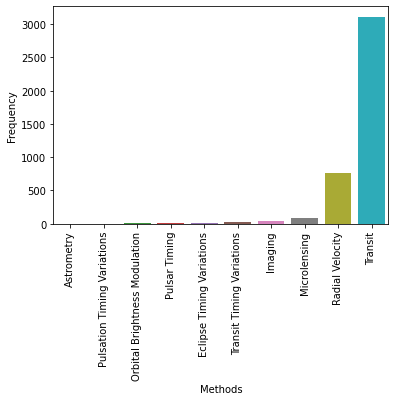

In [54]:
fig, ax = plt.subplots()
sns.countplot(data=df, x='P_DETECTION', order=df['P_DETECTION'].value_counts().sort_values(ascending=True).index)
ax.set_xlabel('Methods')
ax.set_ylabel('Frequency')
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

#### Comparación con la tierra

No handles with labels found to put in legend.


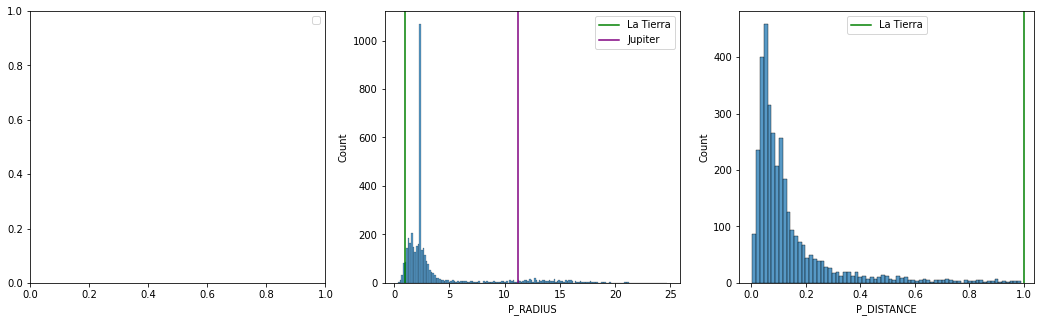

In [55]:
fig, ax = plt.subplots(ncols=3, figsize=(18, 5))
#print('La media es: ', df['P_MASS'].median())
#sns.histplot(ax=ax[0], data=df, x='P_MASS', bins=bins_freedman(df['P_MASS']))
#ax[0].axvline(x= 1, c='green', label='La Tierra')
ax[0].legend()
sns.histplot(ax=ax[1], data=df[df['P_RADIUS'] < 20], x='P_RADIUS', bins=bins_freedman(df[df['P_RADIUS'] < 20]['P_RADIUS']))
ax[1].axvline(x= 1, c='green', label='La Tierra')
ax[1].axvline(x= 11.21, c='purple', label='Jupiter')
ax[1].legend()
sns.histplot(ax=ax[2], data=df[df['P_DISTANCE'] < 1], x='P_DISTANCE', bins=bins_freedman(df[df['P_DISTANCE'] < 1]['P_DISTANCE']))
ax[2].axvline(x= 1, c='green', label='La Tierra')
ax[2].legend()

#### ESI (INDICE DE SIMILITUD CON LA TIERRA)

In [56]:
fig = px.scatter(df.query("P_ESI > 0.75"), x="P_RADIUS", y="S_DISTANCE",
        size="S_DISTANCE", color="P_ESI", hover_name="P_NAME", log_x=False, size_max=30)
fig.show()

<AxesSubplot:>

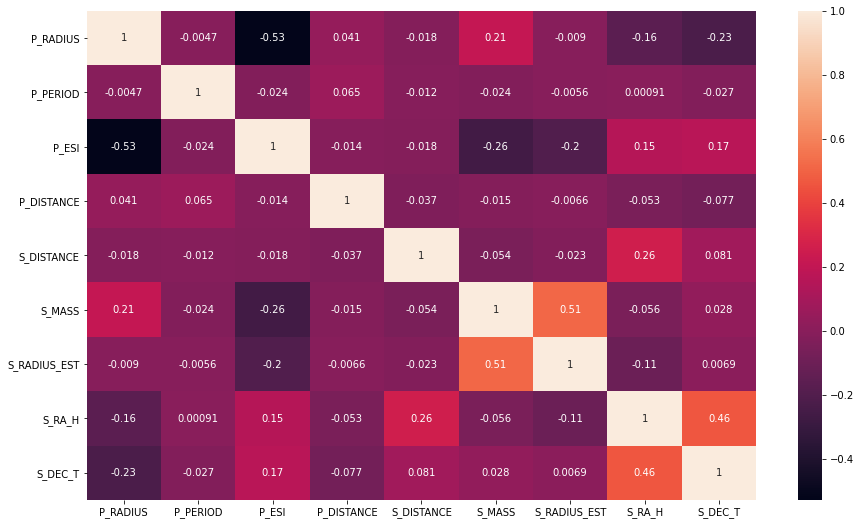

In [57]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data=df.corr(), annot=True)

In [ ]:
sns.pairplot(df)